In [44]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
def define_and_train_network(kernel_size, feature_maps1, feature_maps2):
  model = Sequential()
  model.add(Conv2D(feature_maps1, kernel_size=(kernel_size, kernel_size),
                  activation='relu',
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(feature_maps2, (kernel_size, kernel_size), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu'))
  model.add(Dense(84, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))

  # https://keras.io/optimizers/ 
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
                metrics=['accuracy'])

  history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print(f"MODEL WITH KERNEL SIZE= {kernel_size}x{kernel_size}, AND FEATURE MAPS= {feature_maps1} and {feature_maps2}", )
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print('Test error:', 1-score[1])

  return history, score, model

In [0]:
from google.colab import files

def plot_graphs(history, exp_num):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  
  plt.savefig('loss'+ exp_num +'.png')
  files.download('loss'+ exp_num +'.png')
  plt.show()

  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.savefig('acc'+ exp_num +'.png')
  files.download('acc'+ exp_num +'.png')
  plt.show()

  # Plot training & validation error values
  error = [1-acc for acc in history.history['acc']]
  val_error = [1-acc for acc in history.history['val_acc']]
  plt.plot(error)
  plt.plot(val_error)
  plt.title('Model error')
  plt.ylabel('Error')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.savefig('error'+ exp_num +'.png')
  files.download('error'+ exp_num +'.png')
  plt.show()

In [47]:
history1, score1, model1 = define_and_train_network(3, 6, 16)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.7711 - acc: 0.7734 - val_loss: 0.2845 - val_acc: 0.9133
Epoch 2/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.2187 - acc: 0.9348 - val_loss: 0.1667 - val_acc: 0.9495
Epoch 3/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.1655 - acc: 0.9507 - val_loss: 0.1318 - val_acc: 0.9603
Epoch 4/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.1383 - acc: 0.9585 - val_loss: 0.1153 - val_acc: 0.9663
Epoch 5/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.1214 - acc: 0.9632 - val_loss: 0.0981 - val_acc: 0.9719
Epoch 6/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.1092 - acc: 0.9666 - val_loss: 0.0919 - val_acc: 0.9705
Epoch 7/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0998 - acc: 0.9695 - val_loss: 0.0848 - val_acc

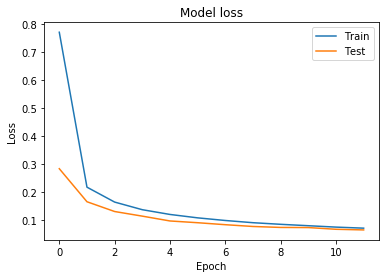

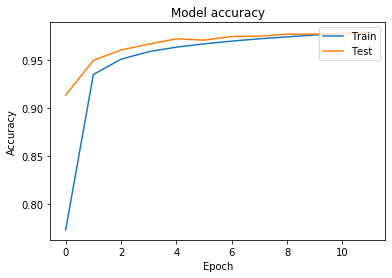

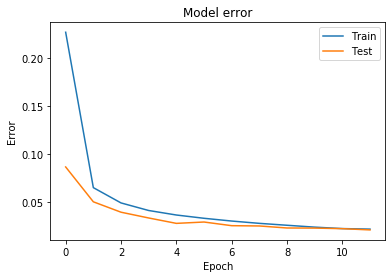

In [77]:
plot_graphs(history1, '1')

In [49]:
history2, score2, model2 = define_and_train_network(5, 6, 16)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.8381 - acc: 0.7353 - val_loss: 0.2285 - val_acc: 0.9314
Epoch 2/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.2056 - acc: 0.9382 - val_loss: 0.1560 - val_acc: 0.9545
Epoch 3/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.1517 - acc: 0.9534 - val_loss: 0.1227 - val_acc: 0.9631
Epoch 4/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.1260 - acc: 0.9617 - val_loss: 0.1004 - val_acc: 0.9692
Epoch 5/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.1091 - acc: 0.9672 - val_loss: 0.0903 - val_acc: 0.9716
Epoch 6/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0979 - acc: 0.9701 - val_loss: 0.0820 - val_acc: 0.9752
Epoch 7/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0884 - acc: 0.9731 - val_loss: 0.0738 - val_acc

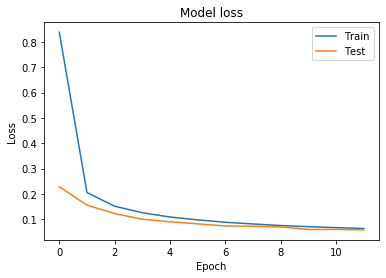

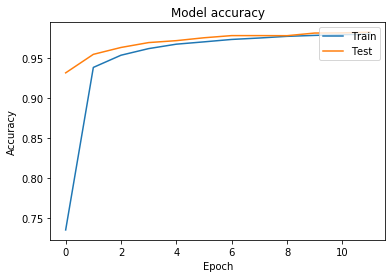

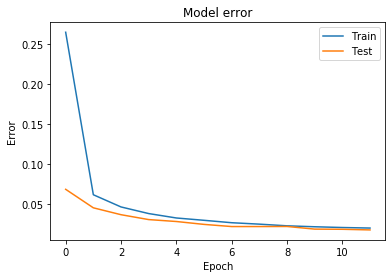

In [78]:
plot_graphs(history2, '2')

In [51]:
history3, score3, model3 = define_and_train_network(3, 16, 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.7423 - acc: 0.7793 - val_loss: 0.2189 - val_acc: 0.9362
Epoch 2/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.1841 - acc: 0.9458 - val_loss: 0.1420 - val_acc: 0.9581
Epoch 3/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.1329 - acc: 0.9606 - val_loss: 0.1085 - val_acc: 0.9687
Epoch 4/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.1068 - acc: 0.9680 - val_loss: 0.0918 - val_acc: 0.9732
Epoch 5/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0906 - acc: 0.9724 - val_loss: 0.0821 - val_acc: 0.9745
Epoch 6/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0799 - acc: 0.9751 - val_loss: 0.0802 - val_acc: 0.9750
Epoch 7/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0708 - acc: 0.9781 - val_loss: 0.0618 - val_acc

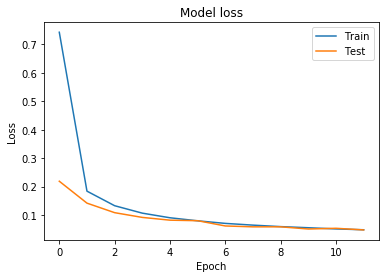

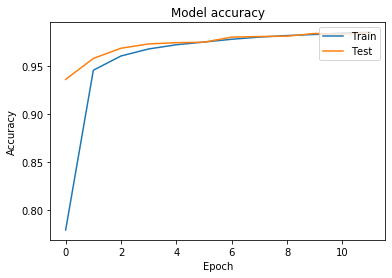

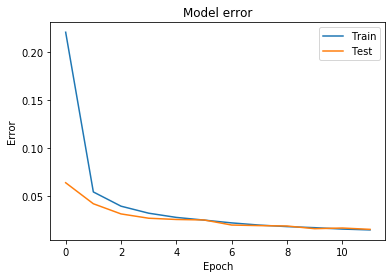

In [79]:
plot_graphs(history3, '3')

In [53]:
history4, score4, model4 = define_and_train_network(5, 16, 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 67us/step - loss: 0.6205 - acc: 0.8173 - val_loss: 0.2031 - val_acc: 0.9398
Epoch 2/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.1754 - acc: 0.9476 - val_loss: 0.1294 - val_acc: 0.9625
Epoch 3/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.1252 - acc: 0.9626 - val_loss: 0.0989 - val_acc: 0.9713
Epoch 4/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.1007 - acc: 0.9699 - val_loss: 0.0930 - val_acc: 0.9718
Epoch 5/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0850 - acc: 0.9743 - val_loss: 0.0770 - val_acc: 0.9757
Epoch 6/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0751 - acc: 0.9773 - val_loss: 0.0623 - val_acc: 0.9812
Epoch 7/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0674 - acc: 0.9796 - val_loss: 0.0581 - val_acc

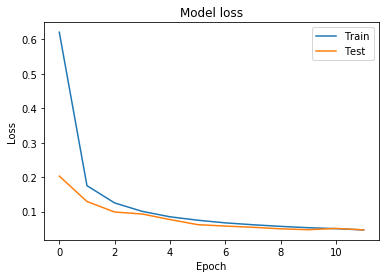

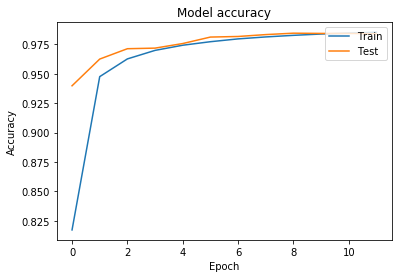

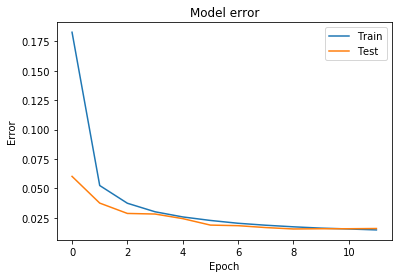

In [80]:
plot_graphs(history4, '4')

In [58]:
history5, score5, model5 = define_and_train_network(5, 32, 64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.5567 - acc: 0.8338 - val_loss: 0.1659 - val_acc: 0.9513
Epoch 2/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.1446 - acc: 0.9572 - val_loss: 0.1093 - val_acc: 0.9660
Epoch 3/12
60000/60000 [==============================] - 3s 45us/step - loss: 0.1015 - acc: 0.9700 - val_loss: 0.0813 - val_acc: 0.9734
Epoch 4/12
60000/60000 [==============================] - 3s 45us/step - loss: 0.0827 - acc: 0.9753 - val_loss: 0.0625 - val_acc: 0.9809
Epoch 5/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.0706 - acc: 0.9790 - val_loss: 0.0550 - val_acc: 0.9823
Epoch 6/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.0617 - acc: 0.9816 - val_loss: 0.0515 - val_acc: 0.9838
Epoch 7/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0551 - acc: 0.9834 - val_loss: 0.0481 - val_acc

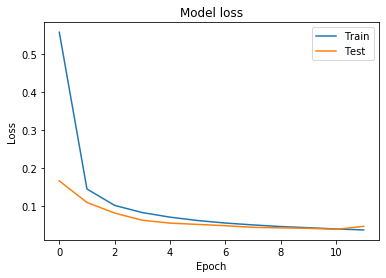

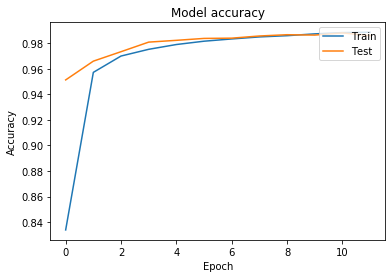

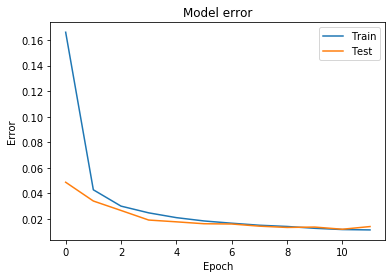

In [81]:
plot_graphs(history5, '5')